## Implementation of Cluster Analysis for Customer Segmentation based on their Spending History

In [1]:
# Importing all required packages for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Import wholesale cusomer dataset and inspect the content
raw_data = pd.read_csv("Wholesale customers data.csv")
raw_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
# Check for missing data and empty records.
raw_data.isnull().value_counts()

Channel  Region  Fresh  Milk   Grocery  Frozen  Detergents_Paper  Delicassen
False    False   False  False  False    False   False             False         440
dtype: int64

<Figure size 720x720 with 0 Axes>

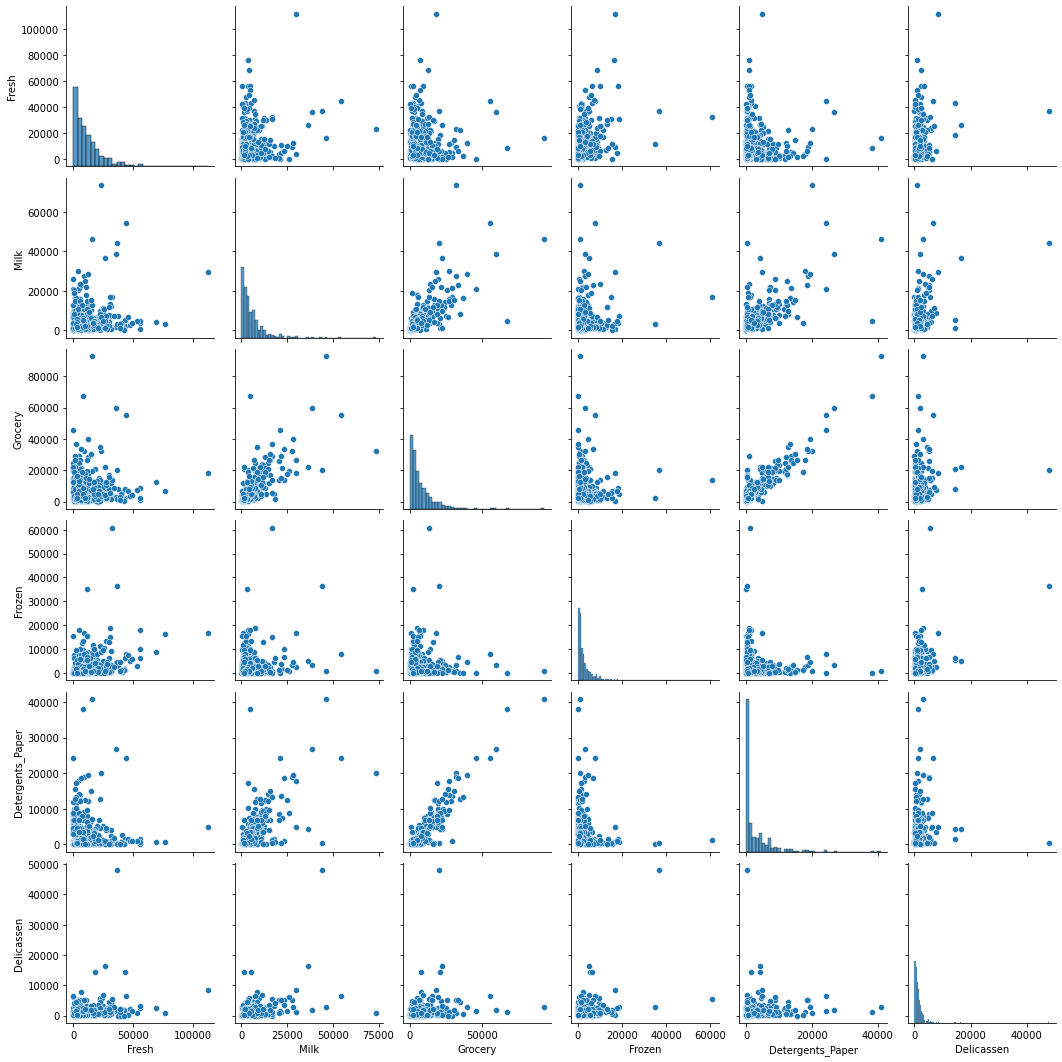

In [5]:
# Using pairplot to visualize the amount spent on each product
plt.figure(figsize=(10,10))
sns.pairplot(raw_data.iloc[:,2:])

In [6]:
#Standardize all variables excluding Channel and Region with StandardScaler

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
dataset = raw_data.iloc[:,2:]
scaled_dataset = scale.fit_transform(dataset)


scaled_dataset

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

## CENTROID BASED CLUSTERING METHOD  K-MEANS 


In [7]:
# KMeans is known to have a memory leak on Windows with MKL when there are less chunks than available threads. 
# Avoid it by setting the environment variable OMP_NUM_THREADS=1.
import os
os.environ["OMP_NUM_THREADS"] = "1" 
# Using Elbow method visualize optimum number of clusters 

from sklearn.cluster import KMeans


wcss = []
for i in range(1,11):
    kmeans_values = KMeans(n_clusters= i, init="k-means++", random_state=70)
    kmeans_values.fit(scaled_dataset)
    wcss.append(kmeans_values.inertia_)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

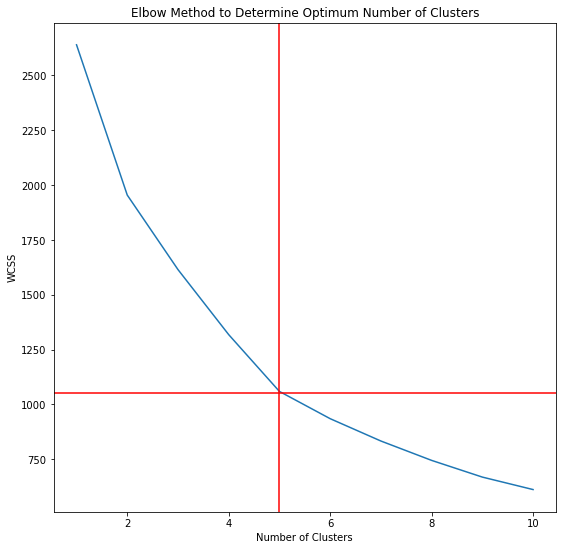

In [8]:
plt.figure(figsize=(9,9))
plt.plot(range(1,11), wcss)
plt.axvline(x=5, ymin=0, ymax = 300, c = 'red')
plt.axhline(y=1050, xmin=0, xmax = 11, c = 'red')
plt.title("Elbow Method to Determine Optimum Number of Clusters")
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.show()

In [26]:
#From Graph above we can select k = 5, Now Generate cluster assignments with k =5

kmeans_values = KMeans(n_clusters=5, init = "k-means++", random_state=70)
cluster_assignments = kmeans_values.fit_predict(scaled_dataset)

cluster_assignments




c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 0, 0, 1, 4, 1, 1, 1, 1, 0, 0, 1, 4, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       4, 0, 0, 1, 1, 1, 0, 4, 1, 1, 1, 4, 1, 0, 4, 0, 0, 4, 4, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 1, 4, 0, 1, 1, 3, 0, 1, 1, 1, 3, 1, 0, 1, 3,
       1, 0, 1, 1, 4, 4, 1, 4, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 3, 3, 4,
       1, 4, 1, 1, 3, 4, 0, 1, 1, 1, 1, 1, 0, 0, 1, 4, 1, 1, 0, 0, 1, 0,
       1, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       4, 1, 1, 1, 1, 4, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 4, 4, 0,
       1, 1, 0, 0, 4, 1, 1, 0, 1, 1, 1, 0, 1, 3, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 4, 0, 4, 1, 1, 4, 4, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 4, 1, 1, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4,
       1, 1, 1, 4, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [27]:
# Assessing Model Clustering Quality with an intrinsic method using the silhouette coefficient measure

from sklearn.metrics import silhouette_score
silhouette_score(scaled_dataset, cluster_assignments)

0.36807191214496154

In [11]:
# We are dealing with a higher dimentionality so to visualize we reduce the Dimentionality to 2 using PCA.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
scaled_dataset_reduced = pca.fit_transform(scaled_dataset)
scaled_dataset_reduced

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

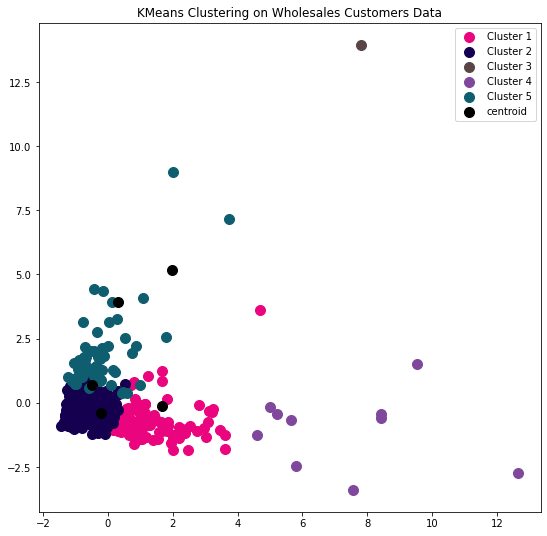

In [12]:
# Visualize the assigned clusters in a scatter plot

color_palette = ['#EA047E', '#150050', '#594545', '#80489C', '#0E5E6F', '#3D5656']

plt.figure(figsize=(9,9))
for i in range(5):
    plt.scatter(scaled_dataset_reduced[cluster_assignments == i, 0], scaled_dataset_reduced[cluster_assignments == i, 1], s =100, c = color_palette[i], label = 'Cluster '+str(1+i) )
plt.scatter(kmeans_values.cluster_centers_[:,0], kmeans_values.cluster_centers_[:,1], s = 100, c = 'black', label = "centroid")
plt.title("KMeans Clustering on Wholesales Customers Data")
plt.legend()
plt.show()

In [13]:
# Extracting the clusters into separate cluster datasets
kmeans_cluster_1 = pd.DataFrame(scale.inverse_transform(scaled_dataset[cluster_assignments == 0]), columns=['Fresh', 'Milk', 'Grocery',	'Frozen', 'Detergents_Paper', 'Delicassen'])
kmeans_cluster_2 = pd.DataFrame(scale.inverse_transform(scaled_dataset[cluster_assignments == 1]), columns=['Fresh', 'Milk', 'Grocery',	'Frozen', 'Detergents_Paper', 'Delicassen'])
kmeans_cluster_3 = pd.DataFrame(scale.inverse_transform(scaled_dataset[cluster_assignments == 2]), columns=['Fresh', 'Milk', 'Grocery',	'Frozen', 'Detergents_Paper', 'Delicassen'])
kmeans_cluster_4 = pd.DataFrame(scale.inverse_transform(scaled_dataset[cluster_assignments == 3]), columns=['Fresh', 'Milk', 'Grocery',	'Frozen', 'Detergents_Paper', 'Delicassen'])
kmeans_cluster_5 = pd.DataFrame(scale.inverse_transform(scaled_dataset[cluster_assignments == 4]), columns=['Fresh', 'Milk', 'Grocery',	'Frozen', 'Detergents_Paper', 'Delicassen'])


In [14]:

# Display descriptive analysis for first cluster
kmeans_cluster_1.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,5724.340206,10822.309278,16535.051546,1458.618557,7169.896907,1812.030928
std,5967.748040,5597.496381,6267.684141,1540.487818,3337.575250,2166.743291
min,18.000000,1275.000000,4748.000000,25.000000,282.000000,3.000000
25%,1406.000000,7097.000000,11532.000000,437.000000,4882.000000,602.000000
50%,3996.000000,9763.000000,14886.000000,955.000000,6747.000000,1371.000000
75%,8040.000000,12844.000000,20399.000000,1840.000000,8752.000000,2158.000000
max,26373.000000,36423.000000,36486.000000,10155.000000,17120.000000,16523.000000


In [15]:
# Display descriptive analysis for second cluster
kmeans_cluster_2.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,9115.319703,2954.368030,3785.810409,2276.747212,978.609665,976.349442
std,6687.941097,2469.054371,2794.550261,2353.055499,1189.588412,899.475393
min,3.000000,55.000000,3.000000,47.000000,3.000000,3.000000
25%,3317.000000,1137.000000,1765.000000,669.000000,199.000000,342.000000
50%,7864.000000,2154.000000,2857.000000,1455.000000,415.000000,709.000000
75%,13569.000000,3880.000000,5226.000000,2946.000000,1247.000000,1328.000000
max,27329.000000,18664.000000,16483.000000,15601.000000,5316.000000,5137.000000


In [16]:
# Display descriptive analysis for third cluster
kmeans_cluster_3.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,1.0,1.0,1.0,1.0,1.0,1.0
mean,36847.0,43950.0,20170.0,36534.0,239.0,47943.0
std,NaN,NaN,NaN,NaN,NaN,NaN
min,36847.0,43950.0,20170.0,36534.0,239.0,47943.0
25%,36847.0,43950.0,20170.0,36534.0,239.0,47943.0
50%,36847.0,43950.0,20170.0,36534.0,239.0,47943.0
75%,36847.0,43950.0,20170.0,36534.0,239.0,47943.0
max,36847.0,43950.0,20170.0,36534.0,239.0,47943.0


In [17]:
# Display descriptive analysis for fourth cluster
kmeans_cluster_4.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,15964.900000,34708.500000,48536.90000,3054.600000,24875.200000,2942.800000
std,14394.616621,19308.486409,20553.47215,2689.795994,8250.298699,1966.992504
min,85.000000,4980.000000,26866.00000,36.000000,17740.000000,903.000000
25%,6741.750000,24217.750000,32482.00000,996.750000,19032.000000,1360.750000
50%,10658.500000,29109.000000,42761.00000,2924.000000,22120.500000,2443.500000
75%,21223.000000,44240.000000,58591.25000,4365.500000,26083.500000,4576.750000
max,44466.000000,73498.000000,92780.00000,7782.000000,40827.000000,6465.000000


In [18]:
# Display descriptive analysis for fifth cluster
kmeans_cluster_5.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,32957.984127,4997.349206,5884.761905,8422.841270,954.603175,2462.968254
std,17247.704151,4814.850077,4535.058497,9178.662583,1151.861306,2752.989314
min,4983.000000,286.000000,471.000000,287.000000,20.000000,3.000000
25%,23123.500000,2068.500000,2307.500000,3003.500000,299.000000,939.000000
50%,29955.000000,3916.000000,5026.000000,6312.000000,523.000000,1819.000000
75%,39966.500000,5458.000000,7726.500000,10473.000000,1099.500000,2792.000000
max,112151.000000,29627.000000,21042.000000,60869.000000,4948.000000,14472.000000
